The Moving Average Crossover strategy is a popular technical analysis technique used by traders to identify potential trend changes and generate buy and sell signals. This strategy involves using two or more moving averages of different periods and plotting them on a price chart.

The two most commonly used moving averages in this strategy are the 50-day moving average (MA50) and the 200-day moving average (MA200). The idea behind this strategy is that the MA50 crossing above the MA200 indicates that the current trend is becoming more bullish, while the MA50 crossing below the MA200 indicates that the current trend is becoming more bearish. Traders will often use this strategy in combination with other technical analysis tools and indicators to confirm signals and make informed trading decisions.

It's important to note that this strategy may not work well in all market conditions, and traders should always conduct proper risk management and due diligence before executing any trades.

An an example here we use Bitcoin prices. Jupyter Notebook is perfect for experiments. Let's go ahead and install the necessary library.

In [ ]:
# Install yfinance on your system
!pip install yfinance seaborn

Now we are about to import the libraries we will use in this notebook

In [23]:
# Yahoo Finance is used for data fetching
import yfinance as yf

# Pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

#matplotlib and seaborn are used for plotting graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
# Read the data. Later you can specify the date range which you want 
data = yf.download('BTC-USD', '2014-01-01', '2023-03-24', auto_adjust=True)

# Display the last few rows of a pandas DataFrame. 
# By default, method tail() displays the last 5 rows
data.tail() 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,37769448859
2023-03-20,28041.601562,28527.724609,27242.880859,27767.236328,44774027664
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689


In [25]:
# Let's get a summary of the distribution of data in each column of our data
data.describe() 

,Open,High,Low,Close,Volume
count,3110.000000,3110.000000,3110.000000,3110.000000,3.110000e+03
mean,13106.186752,13435.039519,12744.377237,13113.616948,1.660323e+10
std,16052.561018,16462.830731,15581.708883,16049.806154,1.983271e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,706.801758,717.440506,699.831741,710.266510,1.108495e+08
50%,7321.682617,7483.302002,7170.350342,7321.514160,8.770960e+09
75%,18684.346680,19196.849609,18061.874512,18724.032227,2.816616e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


We have some data to work with and a general understanding of it, so let's create a visualization.

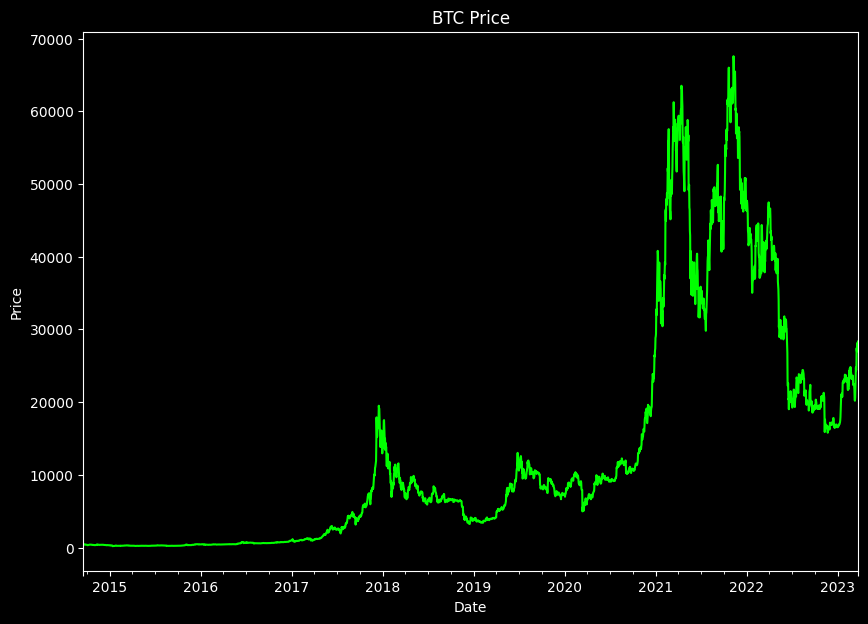

In [26]:
# set the figure background color to black
plt.style.use('dark_background')


# Create a graph that displays the price of BTC over time.

data['Close'].plot(figsize=(10, 7), color='lime')
plt.title('BTC Price')
plt.ylabel('Price')
plt.show()

Let's take a closer look at the long and short moving averages now.

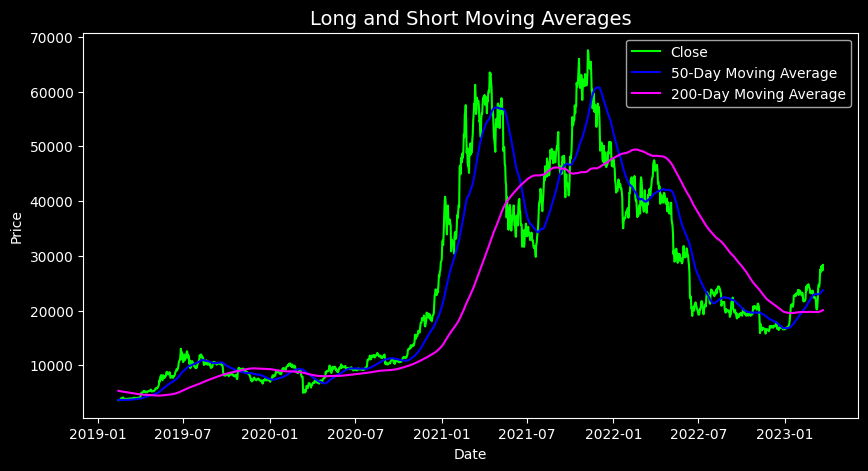

In [32]:
# Define long and short window
short_window = 50
long_window = 200

# Calculate moving averages
data['short_mavg'] = data['Close'].rolling(short_window).mean()
data['long_mavg'] = data['Close'].rolling(long_window).mean()

# Plot close price and moving averages
plot_data = data[-1500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(plot_data['Close'], label='Close', color='lime')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average', color='blue')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average', color='magenta')

plt.legend()

In order to visualize the signals for buying or selling based on the moving average crossover, we need to compare the short and long moving averages and record the relevant signals in the dataframe.

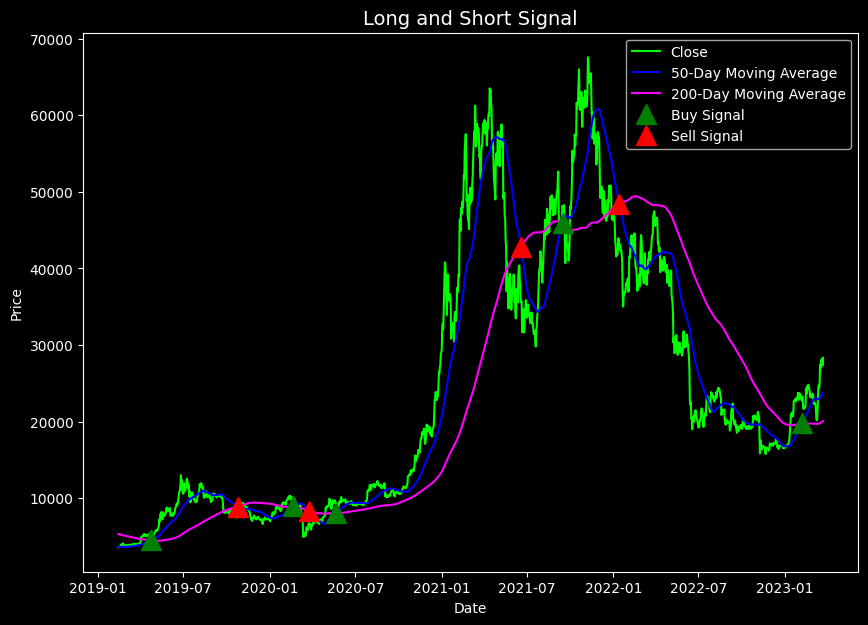

In [34]:
# Take long positions
data['long_positions'] = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)

# Take short positions
data['short_positions'] = np.where(data['short_mavg'] < data['long_mavg'], -1, 0)

# Let's put our decision in terms of buying (1) and selling(-1) into a new column "positions"
data['positions'] = data['long_positions'] + data['short_positions']

# Plot close price and moving averages
plot_data = data[-1500:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(plot_data['Close'], label='Close', color='lime')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average', color='blue')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average', color='magenta')

plt.plot(plot_data[(plot_data['long_positions'] == 1) &
                  (plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
        '^', ms=15, label='Buy Signal', color='green')

plt.plot(plot_data[(plot_data['short_positions'] == -1) &
                  (plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
        '^', ms=15, label='Sell Signal', color='red')

plt.legend()
plt.show()

No doubt, that returns is one of the most important metrics to evaluate a trading strategy. Let's compute and visualize it.

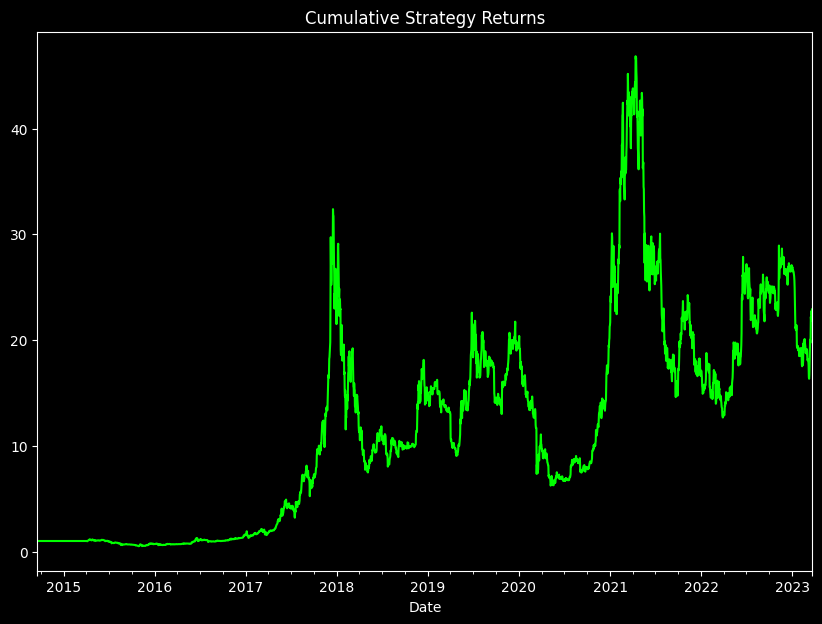

In [36]:
# Calculate daily returns
data['returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['returns'] * data['positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (data['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7), color='lime')
plt.title('Cumulative Strategy Returns')
plt.show()

However, there are additional essential metrics for evaluating the effectiveness of your strategy.

In [37]:
# Total number of trading days
days = len(cumulative_returns)

# Calculate compounded annual growth rate
annualised_returns = (cumulative_returns.iloc[-1]**(365/days)-1)*100

# Calculate annualised volatility
annualised_volatility = np.std(data.strategy_returns)*(365**0.5)*100

# Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/365

sharpe_ratio = np.sqrt(365)*(np.mean(data.strategy_returns) - 
                            (risk_free_rate))/np.std(data.strategy_returns)

# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100

print('The annualised returns of strategy is %.2f' % annualised_returns + '%')
print('The annualised volatility of strategy is %.2f' % annualised_volatility + '%')
print('The risk free rate is %.2f' % risk_free_rate)
print('The sharpe ratio is %.2f' % sharpe_ratio)
print('The percentage drawdown is %.2f' % max_dd + '%')

The annualised returns of strategy is 44.44%
The annualised volatility of strategy is 69.94%
The risk free rate is 0.00
The sharpe ratio is 0.86
The percentage drawdown is -80.74%
